In [1]:
import os
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi
import matplotlib.pyplot as plt
import seaborn as sns

def download_and_unzip_kaggle_dataset(api, dataset, download_path):
    response = api.dataset_download_files(dataset, path=download_path, unzip=True)
    print(f"Downloaded and unzipped dataset {dataset}")
    return response

def read_csv(csv_file_path):
    df = pd.read_csv(csv_file_path)
    return df


def main():
    # Authenticate Kaggle API
    api = KaggleApi()
    api.authenticate()

    # Define datasets and download directory
    datasets = [
        'alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml',
        'berkeleyearth/climate-change-earth-surface-temperature-data'
    ]
    data_dir = '../data'

    # Download and unzip datasets
    for dataset in datasets:
        download_and_unzip_kaggle_dataset(api, dataset, data_dir)

    # Define CSV file paths
    csv_files = {
        'agri': os.path.join(data_dir, 'Agrofood_co2_emission.csv'),
        'temp': os.path.join(data_dir, 'GlobalLandTemperaturesByCountry.csv')
    }

    global emission, temperature
    emission = read_csv(csv_files['agri'])
    temperature = read_csv(csv_files['temp'])

    display(emission)
    display(temperature)
    # except Exception as e:
    #     print(f"Error occurred: {e}")

if __name__ == "__main__":
    main()

Dataset URL: https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml
Downloaded and unzipped dataset alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml
Dataset URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
Downloaded and unzipped dataset berkeleyearth/climate-change-earth-surface-temperature-data


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


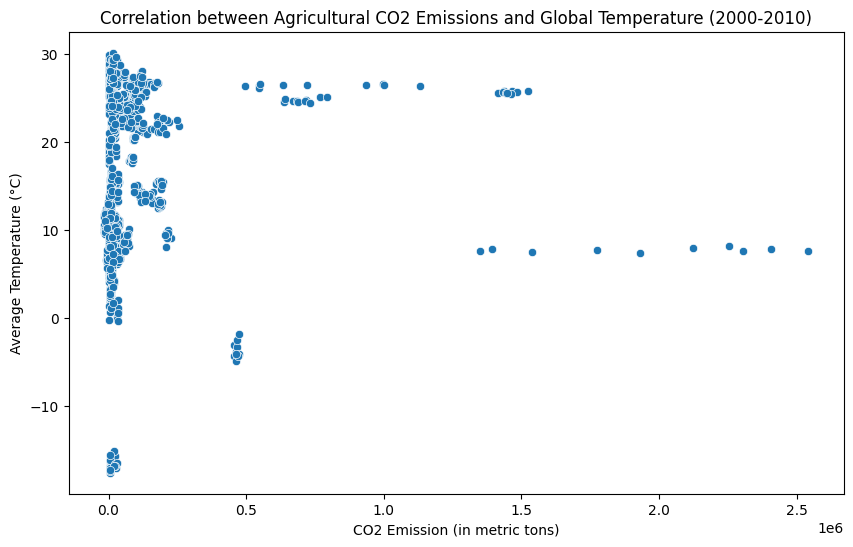

Correlation coefficient between CO2 Emission and Average Temperature: -0.06


In [2]:
# Load the data
co2_emission_df = emission
temperature_df = temperature

co2_emission_df['Year'] = co2_emission_df['Year'].astype(str)

# Convert 'dt' to datetime in temperature_df and extract the year as a string
temperature_df['dt'] = pd.to_datetime(temperature_df['dt'])
temperature_df['Year'] = temperature_df['dt'].dt.year.astype(str)

co2_emission_df_filtered = co2_emission_df[(co2_emission_df['Year'] >= '2000') & (co2_emission_df['Year'] <= '2010')]
temperature_df_filtered = temperature_df[(temperature_df['Year'] >= '2000-01-01') & (temperature_df['Year'] <= '2010-12-31')]


# Data cleaning and processing
# Aggregating the temperature data by year and country
temperature_agg = temperature_df_filtered.groupby(['Year', 'Country'])['AverageTemperature'].mean().reset_index()

# Aggregating CO2 emission data by year and country
co2_emission_agg = co2_emission_df_filtered.groupby(['Year', 'Area'])['total_emission'].sum().reset_index()

# Merging the datasets on Year and Country
merged_df = pd.merge(temperature_agg, co2_emission_agg, left_on=['Year', 'Country'], right_on=['Year', 'Area'], how='inner')
merged_df.rename(columns={'EmissionValue': 'CO2 Emission'}, inplace=True)

# Plotting the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='total_emission', y='AverageTemperature')
plt.title('Correlation between Agricultural CO2 Emissions and Global Temperature (2000-2010)')
plt.xlabel('CO2 Emission (in metric tons)')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Display the correlation coefficient
correlation = merged_df[['total_emission', 'AverageTemperature']].corr().iloc[0, 1]
print(f"Correlation coefficient between CO2 Emission and Average Temperature: {correlation:.2f}")

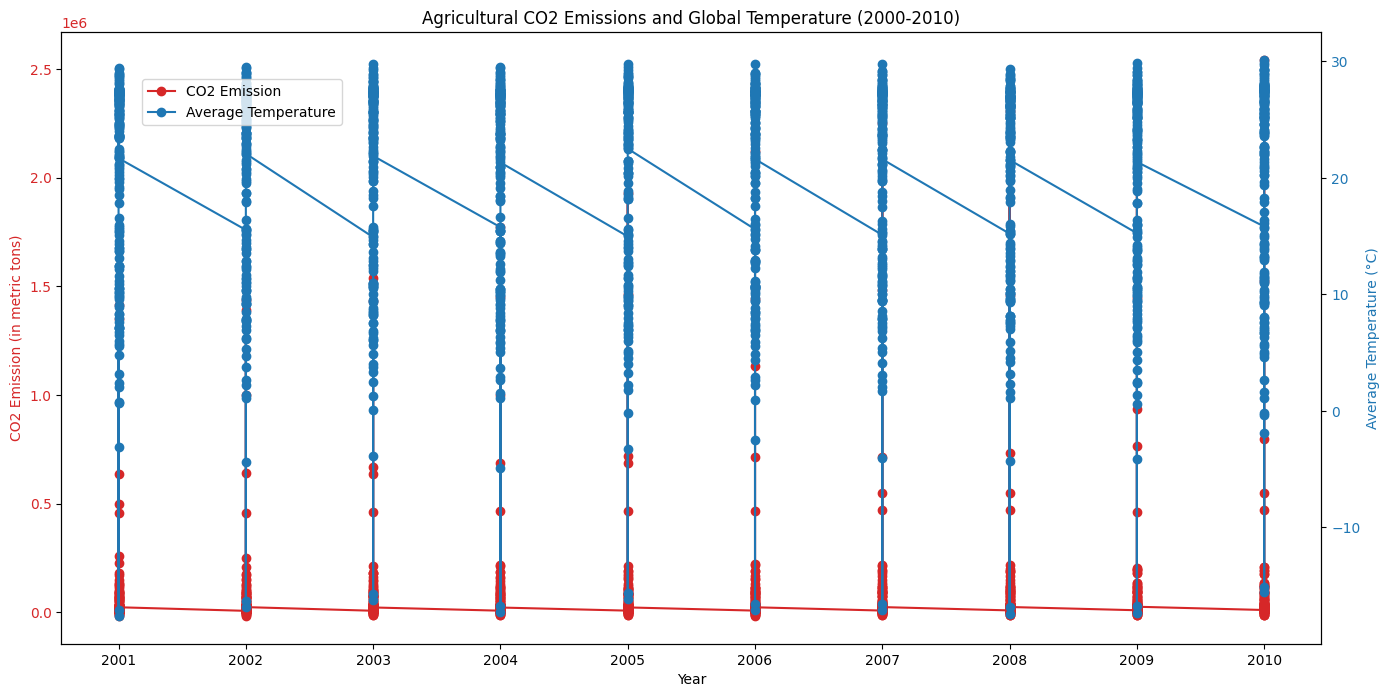

Correlation coefficient between CO2 Emission and Average Temperature: -0.06


In [4]:
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('CO2 Emission (in metric tons)', color=color)
ax1.plot(merged_df['Year'], merged_df['total_emission'], color=color, marker='o', label='CO2 Emission')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Average Temperature (°C)', color=color)  # we already handled the x-label with ax1
ax2.plot(merged_df['Year'], merged_df['AverageTemperature'], color=color, marker='o', label='Average Temperature')
ax2.tick_params(axis='y', labelcolor=color)

# Add title and show plot
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Agricultural CO2 Emissions and Global Temperature (2000-2010)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.show()

# Display the correlation coefficient
correlation = merged_df[['total_emission', 'AverageTemperature']].corr().iloc[0, 1]
print(f"Correlation coefficient between CO2 Emission and Average Temperature: {correlation:.2f}")